In [ ]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 设置文件路径
file_path = os.path.join('../dataset', 'pretrain_large.jsonl')

# 检查文件是否存在
if not os.path.exists(file_path):
    print(f"错误：文件 {file_path} 不存在")
    exit(1)

# 读取 JSONL 文件到 Pandas DataFrame
print("正在读取 JSONL 文件...")
data_list = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        try:
            data_list.append(json.loads(line.strip()))
        except json.JSONDecodeError:
            print(f"警告：跳过无效的 JSON 行")

# 转换为 DataFrame
df = pd.DataFrame(data_list)

# 字符串列的长度统计 - 超简洁版本
string_cols = df.select_dtypes(include=['object']).columns
if not string_cols.empty:
    print("\n字符串列的长度统计 (简洁版):")
    
    # 创建一个函数来计算字符串长度
    def get_str_stats(series):
        if series.apply(lambda x: isinstance(x, str)).all():
            return series.str.len().describe()
        return None
    
    # 对每个字符串列应用统计函数
    stats = {col: get_str_stats(df[col]) for col in string_cols}
    
    # 过滤掉非字符串列
    stats = {k: v for k, v in stats.items() if v is not None}
    
    # 将结果转换为DataFrame并显示
    if stats:
        stats_df = pd.DataFrame(stats).T
        display(stats_df)

正在读取 JSONL 文件...


In [13]:
# 字符串列的长度统计 - 超简洁版本
string_cols = df.select_dtypes(include=['object']).columns
if not string_cols.empty:
    print("\n字符串列的长度统计 (简洁版):")
    
    # 创建一个函数来计算字符串长度
    def get_str_stats(series):
        if series.apply(lambda x: isinstance(x, str)).all():
            return series.str.len().describe()
        return None
    
    # 对每个字符串列应用统计函数
    stats = {col: get_str_stats(df[col]) for col in string_cols}
    
    # 过滤掉非字符串列
    stats = {k: v for k, v in stats.items() if v is not None}
    
    # 将结果转换为DataFrame并显示
    if stats:
        stats_df = pd.DataFrame(stats).T
        display(stats_df)


字符串列的长度统计 (简洁版):


,count,mean,std,min,25%,50%,75%,max
text,1413103.0,399.403903,79.880136,257.0,334.0,416.0,467.0,519.0


In [5]:
import random
print("\n随机抽取的5条数据:")
random_indices = random.sample(range(len(df)), min(5, len(df)))
random_samples = df.iloc[random_indices]

# 在Jupyter中直接显示DataFrame表格
display(random_samples)


随机抽取的5条数据:


,text
1328193,<s>\n角色介绍：\n角色一：小明，一个年轻的程序员，正在开发一个新的应用程序。\n角色二...
998299,<s>以下是一道小学数学题：小明手里有15个糖果，他要分给他的4位小伙伴，每个小伙伴分到的糖...
1282516,"<s>患者于2008年行原发性肝癌切除术,2012-11月于我科行肝动脉化疗栓塞术,术后恢复..."
1359671,<s>基于以下角色信息完成一段对话\nJack：一名医生，拥有十年的临床经验。他是一个务实的...
1185593,<s>在给定的文本中寻找特定关键词，并给出其上下文。\n请找出以下句子中“大富翁”这个词的上...


In [ ]:
from transformers import AutoTokenizer
import sys
import os
sys.path.append('..')
from dataset.lm_dataset import PretrainDataset

tokenizer = AutoTokenizer.from_pretrained('../model/')
dataset = PretrainDataset('../dataset/pretrain_hq.jsonl', tokenizer, 512)

# 测试几个单独的样本
sample_indices = [0, 1, 2]  # 测试前3个样本
    
print("\n测试单个样本:")
for idx in sample_indices:
    print(f"\n样本 #{idx}:")
    X, Y, loss_mask = dataset[idx]
    
    # 显示原始样本
    raw_sample = dataset.samples[idx]
    print(f"原始文本 (前100个字符): {raw_sample['text'][:100]}...")
    
    # 解码处理后的输入和目标
    input_text = tokenizer.decode(X)
    target_text = tokenizer.decode(Y)
    
    print(f"处理后的输入 (前100个字符): {input_text[:100]}...")
    print(f"处理后的目标 (前100个字符): {target_text[:100]}...")
    print(f"输入形状: {X.shape}, 目标形状: {Y.shape}, 损失掩码形状: {loss_mask.shape}")
   


测试单个样本:

样本 #0:
原始文本 (前100个字符): <s>鉴别一组中文文章的风格和特点，例如官方、口语、文言等。需要提供样例文章才能准确鉴别不同的风格和特点。</s> <s>好的，现在帮我查一下今天的天气怎么样?今天的天气依据地区而异。请问你需要我帮你...
处理后的输入 (前100个字符): <s>鉴别一组中文文章的风格和特点，例如官方、口语、文言等。需要提供样例文章才能准确鉴别不同的风格和特点。</s> <s>好的，现在帮我查一下今天的天气怎么样?今天的天气依据地区而异。请问你需要我帮你...
处理后的目标 (前100个字符): s>鉴别一组中文文章的风格和特点，例如官方、口语、文言等。需要提供样例文章才能准确鉴别不同的风格和特点。</s> <s>好的，现在帮我查一下今天的天气怎么样?今天的天气依据地区而异。请问你需要我帮你查...
输入形状: torch.Size([511]), 目标形状: torch.Size([511]), 损失掩码形状: torch.Size([511])
有效标记比例: 73.39%

样本 #1:
原始文本 (前100个字符): <s>根据输入的内容，编写一个类别标签。
这是一篇介绍如何阅读心电图的文章类别标签: 医学/心电图阅读指南</s> <s>帮我搜索一下最近的天气情况。当然，我可以帮您搜索最新的天气情况。请问您需要查询...
处理后的输入 (前100个字符): <s>根据输入的内容，编写一个类别标签。
这是一篇介绍如何阅读心电图的文章类别标签: 医学/心电图阅读指南</s> <s>帮我搜索一下最近的天气情况。当然，我可以帮您搜索最新的天气情况。请问您需要查询...
处理后的目标 (前100个字符): s>根据输入的内容，编写一个类别标签。
这是一篇介绍如何阅读心电图的文章类别标签: 医学/心电图阅读指南</s> <s>帮我搜索一下最近的天气情况。当然，我可以帮您搜索最新的天气情况。请问您需要查询哪...
输入形状: torch.Size([511]), 目标形状: torch.Size([511]), 损失掩码形状: torch.Size([511])
有效标记比例: 68.30%

样本 #2:
原始文本 (前100个字符): <s>客户要求看一份报告，但他没有说明他需要哪份报告。他是指哪份报告？这个问题没有

e:\workspace\study_llm_in_action\study_llm_in_action\dataset\lm_dataset.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(input_ids[:-1], dtype=torch.long)
e:\workspace\study_llm_in_action\study_llm_in_action\dataset\lm_dataset.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(input_ids[1:], dtype=torch.long)
e:\workspace\study_llm_in_action\study_llm_in_action\dataset\lm_dataset.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss_mask = torch.tensor(loss_mask[1:], dtype=torch.long)


文件大小: 24.75 GB
开始处理大型JSONL文件...
计算文件总行数...
文件总行数: 22807765
开始分批处理文件...


处理进度: 100%|██████████| 22807765/22807765 [03:17<00:00, 115467.07it/s]



文件共有 22807765 行数据
检测到的列: text
每条记录的平均字段数: 1.00

字符串列的长度统计:


,count,max,mean,min
text,22807765.0,1024.0,589.439356,0.0



数据样本 (前10行):


,text
0,三秦民谣\n秦.无名氏\n武功太白，去天三百。孤云两角，去天一握。山水险阻，黄金子午。蛇盘鸟...
1,满江红·再题精忠柏，调寄满江红，步武穆韵\n清末民国初.王照\n世宙无常，总万汇、终归衰歇。...
2,数点征帆，凭栏处、海天萧瑟。试侧耳、鲸鲵鼓荡，风雷消息。蚩蠢群生谁济渡，时机万变难窥测。叹两...
3,垂垂冻碧。对翠尊酒冷，香堕吟席。石火光阴，花谢花开，何郎自恋江国。看花白发人还在，懒谱入、东...
4,清末民国初.夏孙桐\n雪剩欺梅，烟轻度柳，瞒人最是东风。铜街似沸，一番箫鼓春浓。赚得杜郎吟赏...
5,芳飐铜荷，艳分银叶，那夕谢娘庭院。酒醒宵阑，记得背人偷剪。似罗帏、双双深笑也，一样春心撩乱。...
6,往余游京华，郑君过我邸。告言子沈子，诗亦同光体。杂然见赠答，色味若粢醴。十年始会面，辍乐正读...
7,一代才人孰绣丝，万千作者亿千诗。吟风弄月各自得，覆酱烧薪空尔悲。正始如闻本风雅，丽葩无奈祖骚...
8,纪事二十四首 其十一\n清末民国初.梁启超\n后顾茫茫虎穴身，忍将多难累红裙。君看十万头颅价...
9,极目中原幕色深，蹉跎负尽百年心。那将涕泪三千斛，换得头颅十万金。鹃拜故林魂寂寞，鹤归华表气萧...


C:\Users\11108118\AppData\Local\Temp\ipykernel_20984\2437506747.py:186: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11108118\AppData\Local\Temp\ipykernel_20984\2437506747.py:186: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11108118\AppData\Local\Temp\ipykernel_20984\2437506747.py:186: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11108118\AppData\Local\Temp\ipykernel_20984\2437506747.py:186: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11108118\AppData\Local\Temp\ipykernel_20984\2437506747.py:186: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\11108118\AppData\Local\Temp\ipykernel_20984\2437506747.py:186: Use

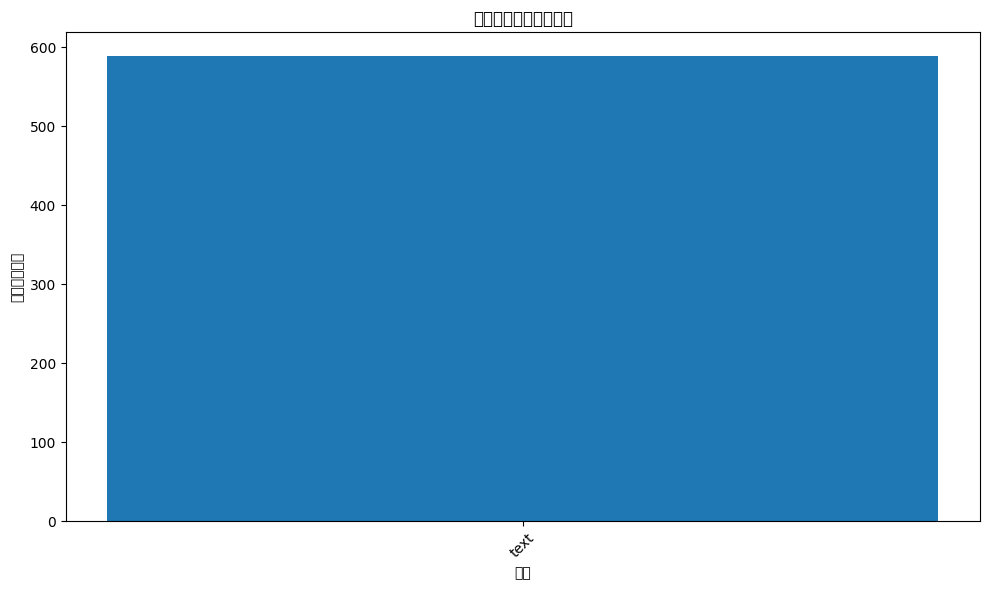

In [2]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import gc
from tqdm import tqdm

# 设置文件路径
file_path = os.path.join('../dataset', 'pretrain_large_new.jsonl')

# 检查文件是否存在
if not os.path.exists(file_path):
    print(f"错误：文件 {file_path} 不存在")
    exit(1)

# 获取文件大小（以GB为单位）
file_size_gb = os.path.getsize(file_path) / (1024 ** 3)
print(f"文件大小: {file_size_gb:.2f} GB")

# 定义分批处理函数
def process_jsonl_in_chunks(file_path, chunk_size=100000):
    """
    分批处理JSONL文件，减少内存占用
    
    参数:
    file_path: JSONL文件路径
    chunk_size: 每批处理的行数
    
    返回:
    各列的统计信息
    """
    # 计算文件总行数（可选，用于进度显示）
    print("计算文件总行数...")
    with open(file_path, 'r', encoding='utf-8') as f:
        total_lines = sum(1 for _ in f)
    
    print(f"文件总行数: {total_lines}")
    
    # 初始化统计信息
    all_columns = set()
    string_length_stats = {}
    sample_data = None
    
    # 用于计算平均字段长度
    total_fields = 0
    total_field_count = 0
    
    # 分批读取并处理
    with open(file_path, 'r', encoding='utf-8') as f:
        batch = []
        line_count = 0
        
        print("开始分批处理文件...")
        for line in tqdm(f, total=total_lines, desc="处理进度"):
            try:
                data = json.loads(line.strip())
                batch.append(data)
                line_count += 1
                
                # 收集所有可能的列名
                all_columns.update(data.keys())
                
                # 统计字段数量（用于计算平均字段长度）
                total_fields += len(data.keys())
                total_field_count += 1
                
                # 当达到批处理大小时，处理当前批次
                if len(batch) >= chunk_size:
                    # 创建临时DataFrame
                    temp_df = pd.DataFrame(batch)
                    
                    # 保存第一批作为样本数据
                    if sample_data is None and line_count <= chunk_size:
                        sample_data = temp_df.head(10)
                    
                    # 处理字符串列的长度统计
                    string_cols = temp_df.select_dtypes(include=['object']).columns
                    for col in string_cols:
                        if col not in string_length_stats:
                            string_length_stats[col] = []
                        
                        # 只对字符串类型的值计算长度
                        str_lengths = temp_df[col].apply(lambda x: len(x) if isinstance(x, str) else 0)
                        
                        # 收集统计信息
                        stats = {
                            'count': str_lengths.count(),
                            'mean': str_lengths.mean(),
                            'min': str_lengths.min(),
                            'max': str_lengths.max()
                        }
                        string_length_stats[col].append(stats)
                    
                    # 清空批次和释放内存
                    batch = []
                    del temp_df
                    gc.collect()
                    
            except json.JSONDecodeError:
                print(f"警告：跳过无效的 JSON 行")
        
        # 处理最后一个批次
        if batch:
            temp_df = pd.DataFrame(batch)
            
            # 保存第一批作为样本数据（如果尚未保存）
            if sample_data is None:
                sample_data = temp_df.head(10)
            
            # 处理字符串列的长度统计
            string_cols = temp_df.select_dtypes(include=['object']).columns
            for col in string_cols:
                if col not in string_length_stats:
                    string_length_stats[col] = []
                
                # 只对字符串类型的值计算长度
                str_lengths = temp_df[col].apply(lambda x: len(x) if isinstance(x, str) else 0)
                
                # 收集统计信息
                stats = {
                    'count': str_lengths.count(),
                    'mean': str_lengths.mean(),
                    'min': str_lengths.min(),
                    'max': str_lengths.max()
                }
                string_length_stats[col].append(stats)
    
    # 合并所有批次的统计信息
    final_stats = {}
    for col, stats_list in string_length_stats.items():
        if not stats_list:
            continue
            
        # 计算总体统计信息
        total_count = sum(s['count'] for s in stats_list)
        weighted_mean = sum(s['mean'] * s['count'] for s in stats_list) / total_count if total_count > 0 else 0
        min_val = min(s['min'] for s in stats_list)
        max_val = max(s['max'] for s in stats_list)
        
        final_stats[col] = {
            'count': total_count,
            'mean': weighted_mean,
            'min': min_val,
            'max': max_val
        }
    
    # 计算平均字段长度
    avg_fields_per_record = total_fields / total_field_count if total_field_count > 0 else 0
    
    return {
        'columns': list(all_columns),
        'string_stats': final_stats,
        'sample_data': sample_data,
        'total_lines': line_count,
        'avg_fields_per_record': avg_fields_per_record
    }

# 执行分批处理
print("开始处理大型JSONL文件...")
results = process_jsonl_in_chunks(file_path)

# 显示结果
print(f"\n文件共有 {results['total_lines']} 行数据")
print(f"检测到的列: {', '.join(results['columns'])}")
print(f"每条记录的平均字段数: {results['avg_fields_per_record']:.2f}")

print("\n字符串列的长度统计:")
stats_df = pd.DataFrame(results['string_stats']).T
display(stats_df)

print("\n数据样本 (前10行):")
display(results['sample_data'])

# 可视化字符串长度分布（如果需要）
if results['string_stats']:
    plt.figure(figsize=(10, 6))
    cols = list(results['string_stats'].keys())
    means = [stats['mean'] for stats in results['string_stats'].values()]
    
    plt.bar(cols, means)
    plt.title('各字符串列的平均长度')
    plt.xlabel('列名')
    plt.ylabel('平均字符长度')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()